## Import Library

In [2]:
# Mengimport Library yang dibutuhkan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score

## Data Understanding

In [3]:
df = pd.read_csv("data_tanaman_padi_sumatra.csv")

In [4]:
df.head()

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,Aceh,1993,1329536.0,323589.0,1627.0,82.00,26.06
1,Aceh,1994,1299699.0,329041.0,1521.0,82.12,26.92
2,Aceh,1995,1382905.0,339253.0,1476.0,82.72,26.27
3,Aceh,1996,1419128.0,348223.0,1557.0,83.00,26.08
4,Aceh,1997,1368074.0,337561.0,1339.0,82.46,26.31


In [5]:
df.dtypes

Provinsi           object
Tahun               int64
Produksi          float64
Luas Panen        float64
Curah hujan       float64
Kelembapan        float64
Suhu rata-rata    float64
dtype: object

In [6]:
print("Jumlah Baris : ", df.shape[0])
print("Jumlah Baris : ", df.shape[1])

Jumlah Baris :  224
Jumlah Baris :  7


In [7]:
df.describe()

,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
count,224.000000,2.240000e+02,224.000000,224.000000,224.000000,224.000000
mean,2006.500000,1.679701e+06,374349.966920,2452.490759,80.948705,26.801964
std,8.095838,1.161387e+06,232751.161987,1031.972625,4.878680,1.197041
min,1993.000000,4.293800e+04,63142.040000,222.500000,54.200000,22.190000
25%,1999.750000,5.488570e+05,146919.500000,1703.525000,78.975000,26.177500
50%,2006.500000,1.667773e+06,373551.500000,2315.700000,82.375000,26.730000
75%,2013.250000,2.436851e+06,514570.250000,3039.700000,84.000000,27.200000
max,2020.000000,4.881089e+06,872737.000000,5522.000000,90.600000,29.850000


In [8]:
df.isnull().sum()

Provinsi          0
Tahun             0
Produksi          0
Luas Panen        0
Curah hujan       0
Kelembapan        0
Suhu rata-rata    0
dtype: int64

### Mengecek Outlier

In [9]:
q1 = df.select_dtypes(exclude=['object']).quantile (0.25)
q3 = df.select_dtypes(exclude=['object']).quantile (0.75)
iqr = q3-q1
iqr

Tahun             1.350000e+01
Produksi          1.887994e+06
Luas Panen        3.676508e+05
Curah hujan       1.336175e+03
Kelembapan        5.025000e+00
Suhu rata-rata    1.022500e+00
dtype: float64

In [10]:
batas_bawah = q1 - (1.5 * iqr)
batas_bawah

Tahun             1.979500e+03
Produksi         -2.283134e+06
Luas Panen       -4.045566e+05
Curah hujan      -3.007375e+02
Kelembapan        7.143750e+01
Suhu rata-rata    2.464375e+01
dtype: float64

In [11]:
batas_atas = q3 + (1.5 * iqr)
batas_atas

Tahun             2.033500e+03
Produksi          5.268841e+06
Luas Panen        1.066046e+06
Curah hujan       5.043962e+03
Kelembapan        9.153750e+01
Suhu rata-rata    2.873375e+01
dtype: float64

In [12]:
outlier_data = (df.select_dtypes(exclude=['object']) < batas_bawah) | (df.select_dtypes(exclude=['object']) > batas_atas)
outlier_data

,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
219,False,False,False,False,False,False
220,False,False,False,False,False,False
221,False,False,False,False,False,False
222,False,False,False,False,False,False


In [ ]:
for col in outlier_filter.columns :

    # Exclude kolom dengan tipe data object
    if df[col].dtype != object :
        print('Nama Kolom:',col)
        print(outlier_filter[col].value_counts())
        print('-------------------')

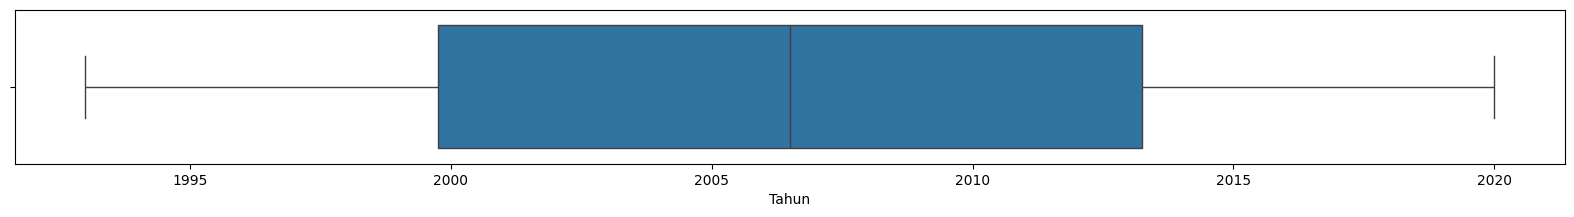

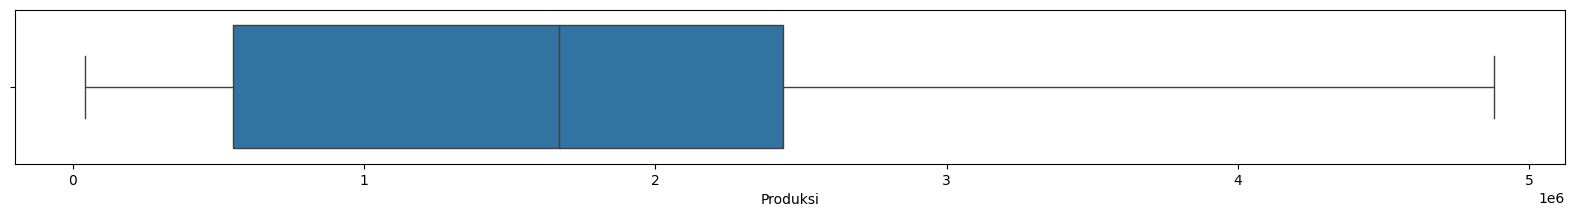

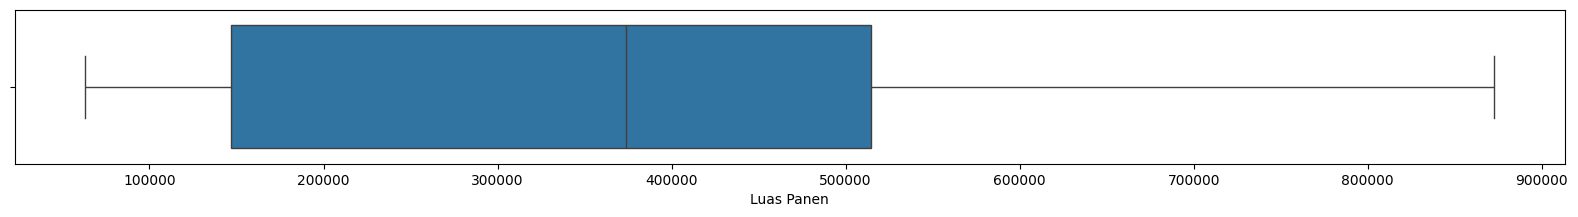

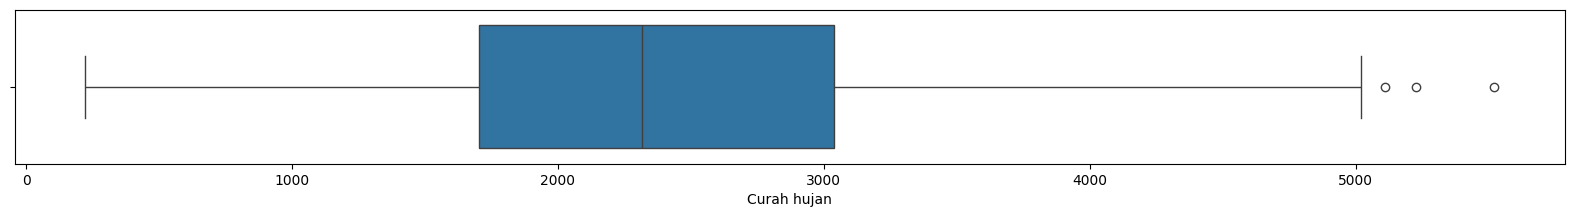

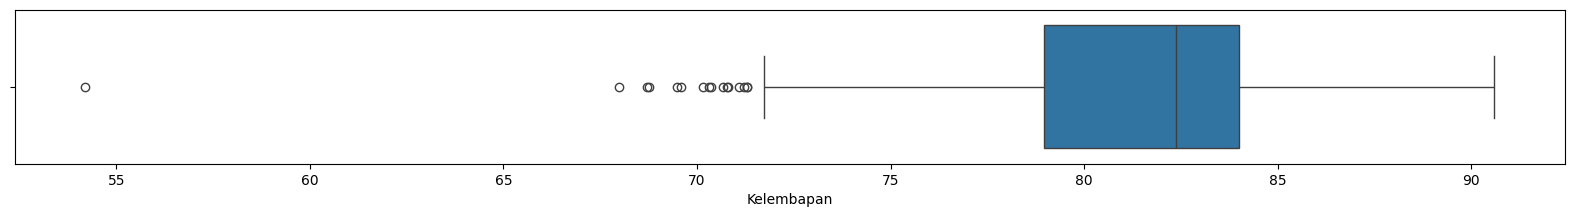

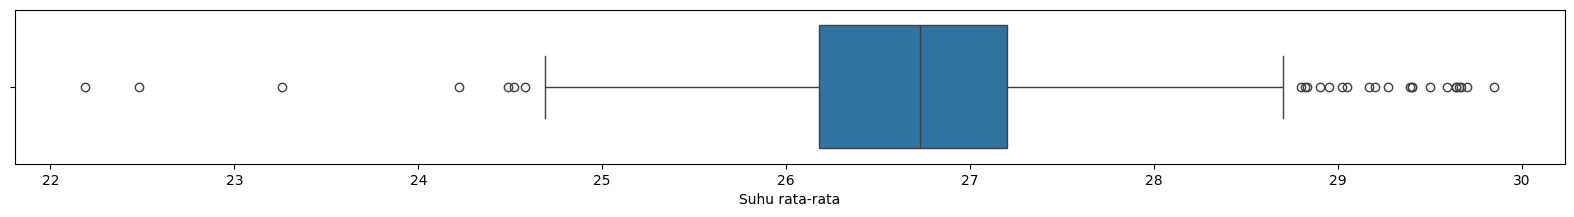

In [14]:
df_outlier = df.select_dtypes(exclude=['object'])
for column in df_outlier:
        plt.figure(figsize=(20,2))
        sns.boxplot(data=df_outlier, x=column)

## Data Preparation

### Handling Outlier

In [15]:
df_outlier_data = df[~((df.select_dtypes(exclude="object") < q1 - 1.5 * iqr) | (df.select_dtypes(exclude="object") > q3 + 1.5 * iqr)).any(axis=1)]

In [16]:
df_outlier_data.shape

(186, 7)

In [17]:
df_outlier_data["Suhu rata-rata"].max()

28.7

In [18]:
df_outlier_data["Suhu rata-rata"].min()

24.69

In [19]:
df_outlier_data["Kelembapan"].max()

90.6

In [20]:
df_outlier_data["Kelembapan"].min()

71.73

#### Handling Outlier Kolom Kelembapan

<Axes: xlabel='Suhu rata-rata'>

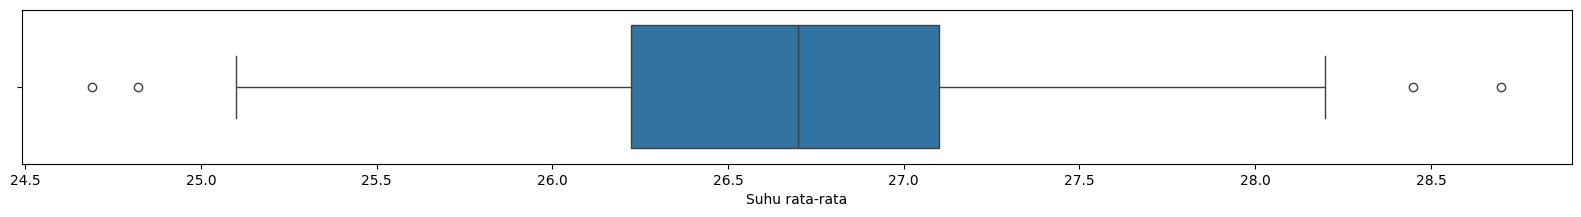

In [21]:
#Outlier Pada Kolom Length
plt.figure(figsize=(20,2))
sns.boxplot(data=df_outlier_data, x=df_outlier_data['Suhu rata-rata'])

In [22]:
q1 = df_outlier_data['Suhu rata-rata'].quantile(0.25)
q3 = df_outlier_data['Suhu rata-rata'].quantile(0.75)
iqr = q3-q1
iqr

0.8750000000000036

In [23]:
batas_atas = q3 + 1.5 * iqr
batas_atas

28.41250000000001

In [24]:
batas_bawah = q1 - 1.5 * iqr
batas_bawah

24.912499999999994

In [25]:
# Total Outliers Yang Ada
total_outliers = (df_outlier_data['Suhu rata-rata'] > batas_atas).sum()
print(total_outliers)

2


In [26]:
# Bersihkan Outlier
df = df_outlier_data[(df_outlier_data['Suhu rata-rata'] >= batas_bawah) & (df_outlier_data['Suhu rata-rata'] <= batas_atas)]

<Axes: xlabel='Suhu rata-rata'>

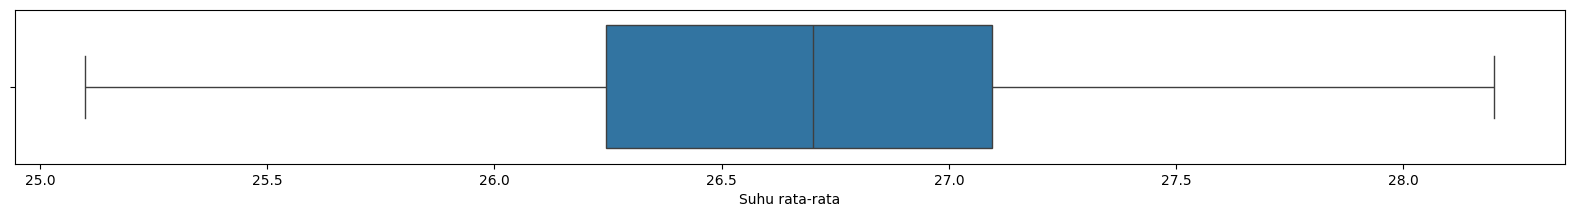

In [27]:
plt.figure(figsize=(20,2))
sns.boxplot(data=df, x=df['Suhu rata-rata'])

#### Handling Outlier Kolom Suhu

<Axes: xlabel='Kelembapan'>

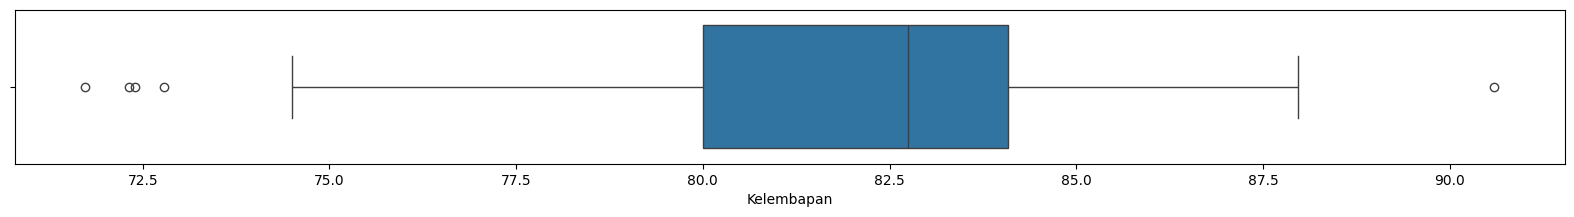

In [28]:
#Outlier Pada Kolom Length
plt.figure(figsize=(20,2))
sns.boxplot(data=df_outlier_data, x=df_outlier_data['Kelembapan'])

In [29]:
q1 = df_outlier_data['Kelembapan'].quantile(0.25)
q3 = df_outlier_data['Kelembapan'].quantile(0.75)
iqr = q3-q1
iqr

4.092500000000001

In [30]:
batas_atas = q3 + 1.5 * iqr
batas_atas

90.23125

In [31]:
batas_bawah = q1 - 1.5 * iqr
batas_bawah

73.86125

In [32]:
# Total Outliers Yang Ada
total_outliers = (df_outlier_data['Kelembapan'] > batas_atas).sum()
print(total_outliers)

1


In [33]:
# Bersihkan Outlier
df = df_outlier_data[(df_outlier_data['Kelembapan'] >= batas_bawah) & (df_outlier_data['Kelembapan'] <= batas_atas)]

<Axes: xlabel='Kelembapan'>

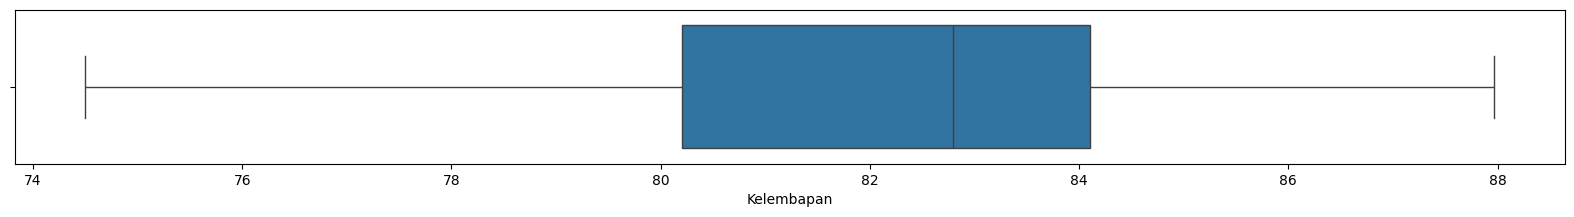

In [34]:
plt.figure(figsize=(20,2))
sns.boxplot(data=df, x=df['Kelembapan'])

## Visualisasi Data

### Visualisasi Produksi di Setiap Provinsi

In [35]:
produksi_provinsi = df.groupby('Provinsi')['Produksi'].count().sort_index()

produksi_provinsi.columns = ['Provinsi', 'Produksi']
produksi_provinsi.head()

Provinsi
Aceh        23
Bengkulu    23
Jambi       24
Lampung     25
Riau        23
Name: Produksi, dtype: int64

In [36]:
# Melihat 3 data terbanyak
produksi_provinsi.sort_values(ascending=False).head(3)

Provinsi
Lampung             25
Sumatera Selatan    25
Jambi               24
Name: Produksi, dtype: int64

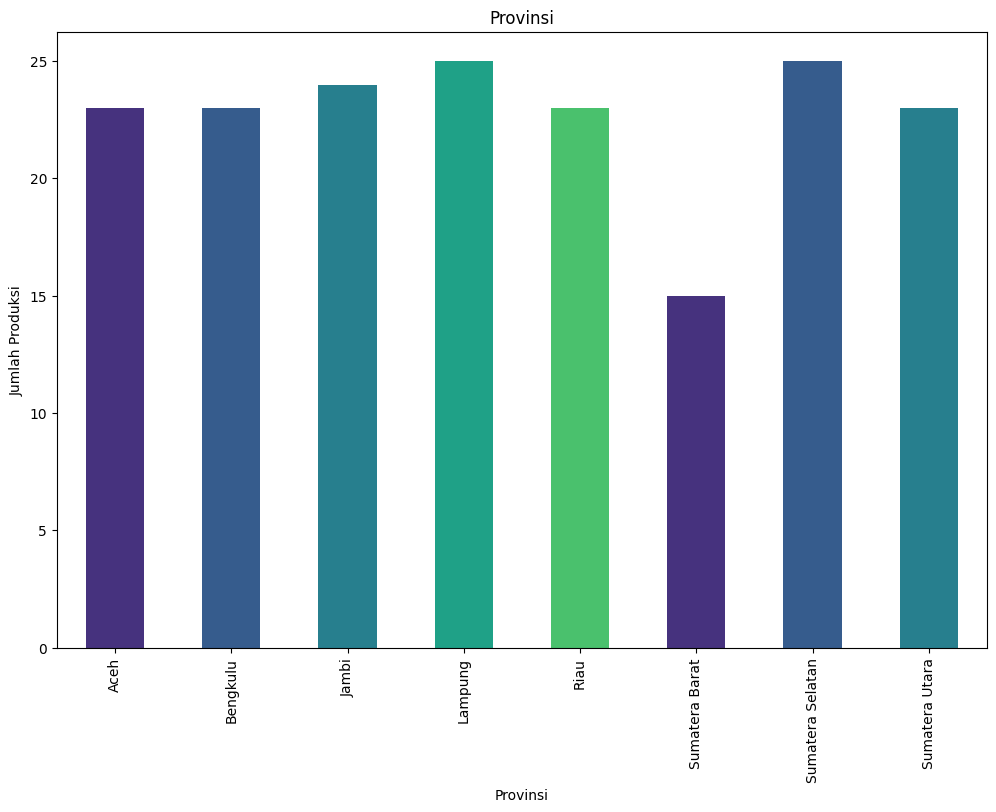

In [37]:
# Melihat Jumlah produksi masing-masing provinsi
plt.figure(figsize=(12,8))
myColors = sns.color_palette('viridis')[0:5]
produksi_provinsi.plot(kind='bar',color=myColors)
plt.ylabel('Jumlah Produksi')
plt.title('Provinsi')
plt.show()

### Visualisasi Tahun Produksi

In [38]:
tahun_produksi = df.groupby('Tahun')['Produksi'].count().sort_index()

tahun_produksi.columns = ['Tahun', 'Produksi']
tahun_produksi.head()

Tahun
1993    7
1994    7
1995    8
1996    7
1997    8
Name: Produksi, dtype: int64

In [39]:
# Melihat 3 data terbanyak
tahun_produksi.sort_values(ascending=False).head(3)

Tahun
2007    8
1995    8
2019    8
Name: Produksi, dtype: int64

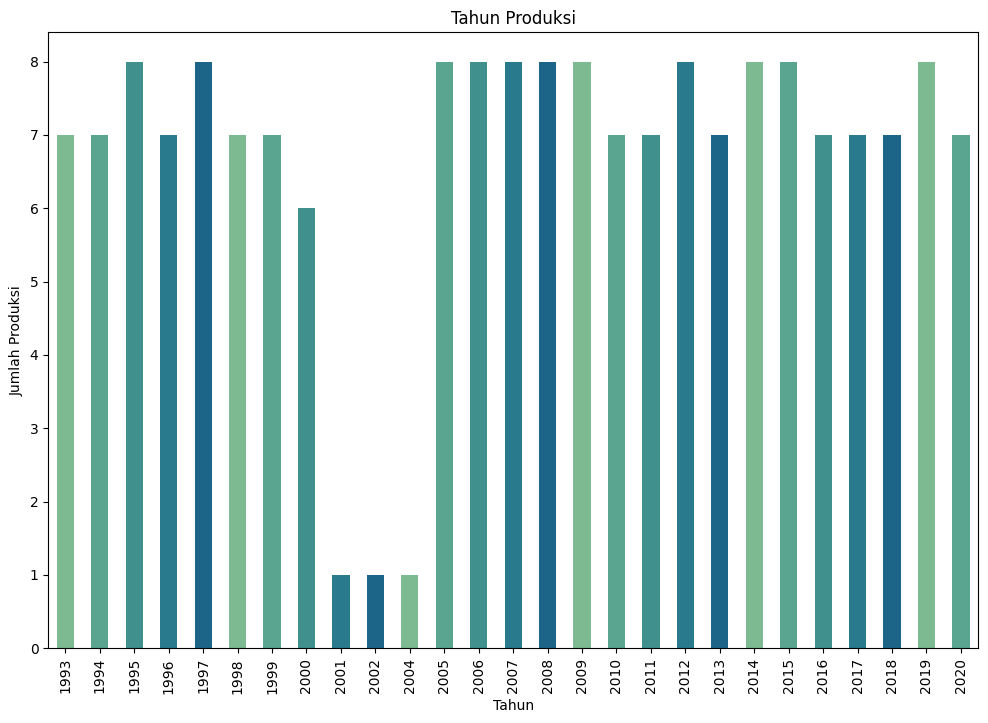

In [40]:
# Melihat Jumlah produksi masing-masing Tahun
plt.figure(figsize=(12,8))
myColors = sns.color_palette('crest')[0:5]
tahun_produksi.plot(kind='bar',color=myColors)
plt.ylabel('Jumlah Produksi')
plt.title('Tahun Produksi')
plt.show()

### Visualisasi Keuntungan Produksi Masing-Masing Provinsi

In [41]:
untung_produksi = df.groupby('Provinsi')['Produksi'].sum().sort_index()

untung_produksi.columns = ['Provinsi', 'Produksi']
untung_produksi.head()

Provinsi
Aceh        38378694.64
Bengkulu    10511129.75
Jambi       13204865.69
Lampung     61770695.24
Riau         9464173.02
Name: Produksi, dtype: float64

In [42]:
# Melihat 3 data terbanyak
untung_produksi.sort_values(ascending=False).head(3)

Provinsi
Sumatera Utara      76259268.72
Sumatera Selatan    68561365.54
Lampung             61770695.24
Name: Produksi, dtype: float64

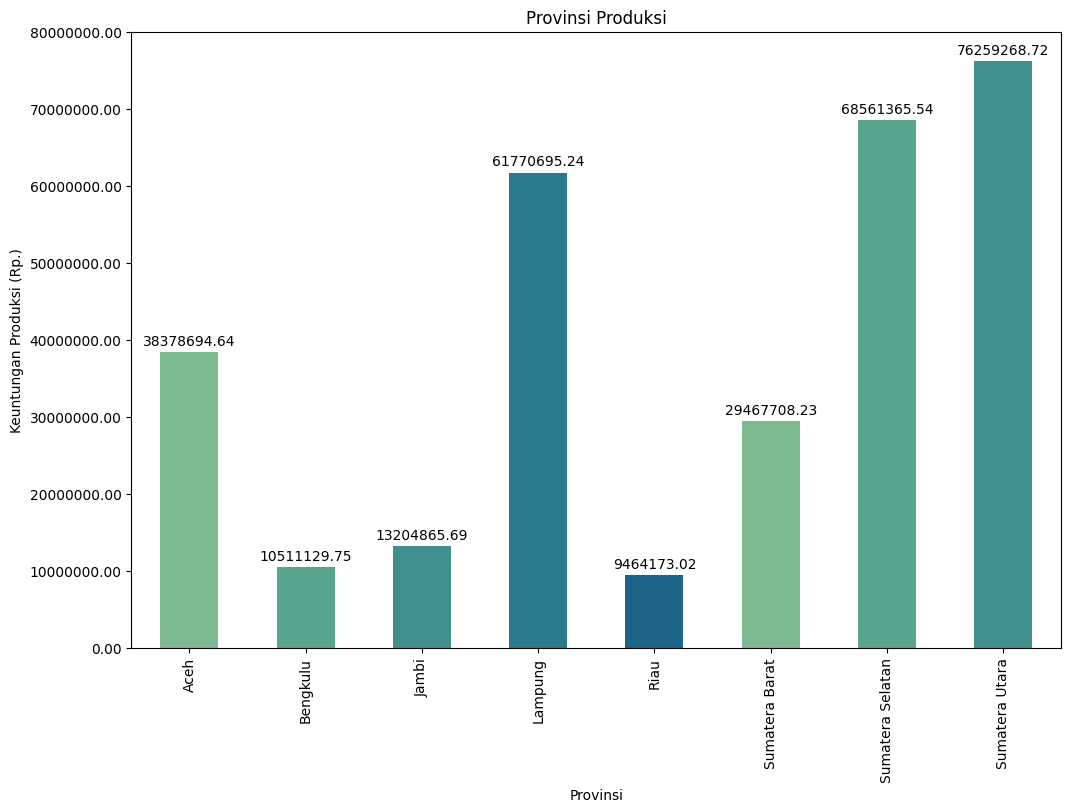

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(12,8))
myColors = sns.color_palette('crest')[0:5]
ax = untung_produksi.plot(kind='bar', color=myColors)

ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.2f}'))

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.ylabel('Keuntungan Produksi (Rp.)')
plt.title('Provinsi Produksi')
plt.show()


## Membangun Model

In [44]:
scaler = RobustScaler()
df[['Suhu rata-rata','Produksi']] = scaler.fit_transform(df[['Suhu rata-rata','Produksi']])

/tmp/ipykernel_168310/3091043127.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Suhu rata-rata','Produksi']] = scaler.fit_transform(df[['Suhu rata-rata','Produksi']])


In [45]:
X = df[['Suhu rata-rata']]
y = df['Produksi']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7,test_size=0.3, random_state=0)

In [47]:
model_linear = LinearRegression()

model_linear.fit(X_train, y_train)

LinearRegression()

In [48]:
model_prediction_lr = model_linear.predict(X_test)

print("Hasil Prediksi adalah : ", model_prediction_lr)

Hasil Prediksi adalah :  [-0.13608021  0.08547789 -0.11825369  0.16187724 -0.15900001 -0.05204093
 -0.09278724 -0.11825369  0.44200816 -0.03166777  0.13641079  0.02435842
  0.11094434  0.09566447  0.16697053  0.07274467 -0.19974633  0.00907855
  0.18734368  0.16187724 -0.32198528  0.12367756  0.0803846  -0.0393077
  0.07783796 -0.07496073  0.5693404  -0.07241409  0.06765138  0.06001144
  0.14405072 -0.03421441  0.26374303 -0.08769395  0.01671848  0.06765138
 -0.19465304  0.08547789 -0.17173323  0.15678395 -0.02657448 -0.0163879
  0.31467592  0.16187724 -0.34745172  0.06255809  0.01926513  0.01162519
 -0.0163879   0.13641079  0.01417184  0.16187724 -0.19465304  0.16187724
  0.23827658]


In [49]:
eval_lr_model = pd.DataFrame({'Hasil Sebenarnya': y_test, 'Hasil Prediksi': model_prediction_lr})

In [50]:
eval_lr_model.head(10)

,Hasil Sebenarnya,Hasil Prediksi
111,-0.692580,-0.136080
12,-0.104988,0.085478
84,-0.606701,-0.118254
218,1.042231,0.161877
172,-0.634568,-0.159000
83,-0.084829,-0.052041
181,-0.636495,-0.092787
161,1.056912,-0.118254
203,0.170086,0.442008
143,0.026152,-0.031668


In [51]:
mse = mean_squared_error(y_test, model_prediction_lr)       
rmse = np.sqrt(mse)                             
r2 = r2_score(y_test, model_prediction_lr)    
r2_percentage = r2 * 100

print(f'MSE model Linear Regression       : {mse}')
print(f'RMSE model Linear Regression      : {rmse}')
print(f'R-squared model Linear Regression : {r2_percentage:.2f}%')

MSE model Linear Regression       : 0.3694839478207732
RMSE model Linear Regression      : 0.6078519127392569
R-squared model Linear Regression : 1.23%


### Logisitic

In [54]:
model_logistic = LogisticRegression(solver = 'lbfgs', max_iter = 1000)

In [ ]:
model_prediction_logistic = model_logistic.predict(X_test)